# Analyzing student grades with pandas and seaborn

In this tutorial we are going to analyze a dataset of student grades.

The dataset was obtained as part of the study for using Data Mining to Predict Secondary School Student Performance by P.Cortez and A.Silva

**Citation:**  
Using Data Mining To Predict Secondary School Student Alcohol Consumption.  
Fabio Pagnotta, Hossain Mohammad Amran  
Department of Computer Science,University of Camerino

## Importing data into pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filepath = '/content/drive/MyDrive/data-science-example-notebooks/student-mat.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

We are going to import data related to a math course.  
The dataset also includes data related to a language course which we are omitting in this tutorial.

Since the majority of columns contain categorical data we

1.   specify the `dtype` as `CategoricalDType` for all columns of the dataframe,
    
2.   and convert the `dtype` for the few numerical columns afterwards.

[learn more about categorical data in pandas](https://pandas.pydata.org/docs/user_guide/categorical.html#)


In [ ]:
df = pd.read_csv(filepath, sep=';', index_col=False, dtype='category').assign(
    age=lambda df: pd.to_numeric(df['age']),
    absences=lambda df: pd.to_numeric(df['absences']),
    G1=lambda df: pd.to_numeric(df['G1']),
    G2=lambda df: pd.to_numeric(df['G2']),
    G3=lambda df: pd.to_numeric(df['G3'])
)

Let's get an overview of the categories that were inferred by pandas on import.

In [ ]:
(
    df.dtypes[
        df.dtypes.apply(isinstance, args=(pd.CategoricalDtype,))
    ].map(lambda cat: cat.categories.tolist())
)

school                                           [GP, MS]
sex                                                [F, M]
address                                            [R, U]
famsize                                        [GT3, LE3]
Pstatus                                            [A, T]
Medu                                      [0, 1, 2, 3, 4]
Fedu                                      [0, 1, 2, 3, 4]
Mjob          [at_home, health, other, services, teacher]
Fjob          [at_home, health, other, services, teacher]
reason                  [course, home, other, reputation]
guardian                          [father, mother, other]
traveltime                                   [1, 2, 3, 4]
studytime                                    [1, 2, 3, 4]
failures                                     [0, 1, 2, 3]
schoolsup                                       [no, yes]
famsup                                          [no, yes]
paid                                            [no, yes]
activities    

More detailed data description is available [here](https://docs.google.com/spreadsheets/d/1mDsF0aMNgODx7063l2mxV1_zP32fAe_P55SBmtG72G8/edit#gid=1914838783).

Let's use this information to improve the labels on some of the categories.

In [ ]:
# create new CategoricalDType for those categories that are shared among several columns
cat_edu = pd.CategoricalDtype(categories=['none', 'pri', 'mid', 'sec', 'higher'], ordered=True)
cat_bad_good = pd.CategoricalDtype(categories=['very_bad', 'bad', 'avg', 'good', 'very_good'], ordered=True)
cat_low_high = pd.CategoricalDtype(categories=['very_low', 'low', 'avg', 'high', 'very_high'], ordered=True)

df = df.astype({
    'Medu': cat_edu,
    'Fedu': cat_edu,
    'famrel': cat_bad_good,
    'health': cat_bad_good,
    'goout': cat_low_high,
    'freetime': cat_low_high,
    'Dalc': cat_low_high,
    'Walc': cat_low_high
}).assign(
    # rename categories on the fly for columns
    traveltime=lambda df: df.traveltime.cat.rename_categories(['>15m', '15m-30m', '30m-1h', '>1h']),
    studytime=lambda df: df.traveltime.cat.rename_categories(['>2h', '2h-5h', '5h-10h', '>10h'])
)

In [ ]:
(
    df.dtypes[
        df.dtypes.apply(isinstance, args=(pd.CategoricalDtype,))
    ].map(lambda cat: cat.categories.tolist())
)

school                                           [GP, MS]
sex                                                [F, M]
address                                            [R, U]
famsize                                        [GT3, LE3]
Pstatus                                            [A, T]
Medu                        [none, pri, mid, sec, higher]
Fedu                        [none, pri, mid, sec, higher]
Mjob          [at_home, health, other, services, teacher]
Fjob          [at_home, health, other, services, teacher]
reason                  [course, home, other, reputation]
guardian                          [father, mother, other]
traveltime                   [>15m, 15m-30m, 30m-1h, >1h]
studytime                      [>2h, 2h-5h, 5h-10h, >10h]
failures                                     [0, 1, 2, 3]
schoolsup                                       [no, yes]
famsup                                          [no, yes]
paid                                            [no, yes]
activities    

## Simple exploratory data analysis through visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

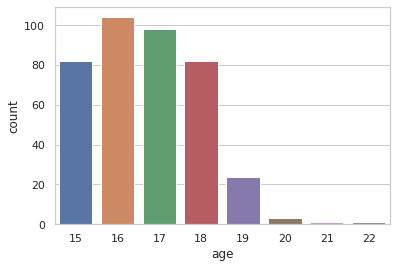

In [ ]:
with sns.axes_style("whitegrid"):
    sns.countplot(x='age', data=df)

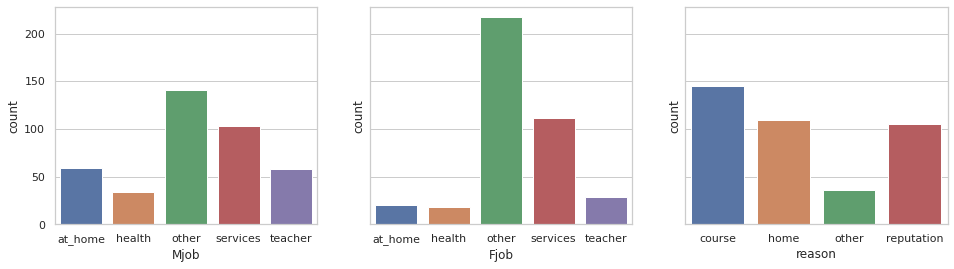

In [ ]:
with sns.axes_style("whitegrid"):
    fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
    
    sns.countplot(x='Mjob', data=df, ax=axs[0])
    sns.countplot(x='Fjob', data=df, ax=axs[1])
    sns.countplot(x='reason', data=df, ax=axs[2])